#### I'm not the proudest of the way I coded this up, but it gets the job done... Please tell me if you'd like me to make it look better!

In [1]:
import morfeus
from rdkit import rdBase, Chem
from chiralizer import chiralizer, tokenizer
from pathlib import Path
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
smiles_file = open('sidechain_smiles.smi', 'r')
smiles = smiles_file.read().splitlines()

In [3]:
len(smiles)

52

## analyzing properties of chiral peptoids

separating chiral and achiral peptoids

In [4]:
for i in range(len(smiles)):
    if chiralizer(smiles[i])[0]:
        print(i)

6
7
8
9
18
19
20
21
24
25
28
34
35
38
43
44
47
51


In [5]:
smiles[47]

'NC(C)C1CCCCC1'

In [6]:
chiral_smiles = [chiralizer(smiles[i])[1] for i in range(len(smiles)) if chiralizer(smiles[i])[0]]

In [7]:
chiral_directory = Path('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/chiral_xyz/')

converting smiles to xyz done on conda command line

### calculating properties

In [8]:
# list of properties
bv_list, cone_list, disp_list, ster_list, xtb_list = [], [], [], [], []

for filename in os.listdir(chiral_directory):
    if filename.endswith('.xyz'):
        elements, coordinates = morfeus.read_xyz('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/chiral_xyz/' + filename)

        # appending results to lists
        bv_list.append((os.path.splitext(filename)[0], morfeus.BuriedVolume(elements, coordinates, 1).fraction_buried_volume))
#        cone_list.append((os.path.splitext(filename)[0], morfeus.ConeAngle(elements, coordinates, 1).cone_angle)) # Exception: ('Atoms within vdW radius of central atom:', '2 6 7')
        disp_list.append((os.path.splitext(filename)[0], morfeus.Dispersion(elements, coordinates).atom_p_int[1])) # P_int value
        ster_list.append((os.path.splitext(filename)[0], morfeus.Sterimol(elements, coordinates, 1, 2).L_value)) # L value
#        xtb_list.append((os.path.splitext(filename)[0], morfeus.XTB(elements,coordinates).get_ip(corrected=True))) # corrected ionization potential   # need to dl xtra to work                      

### separating left and right

In [9]:
left_bv = [i[1] for i in bv_list if 'a' in i[0]]
right_bv = [i[1] for i in bv_list if 'b' in i[0]]

left_disp = [i[1] for i in disp_list if 'a' in i[0]]
right_disp = [i[1] for i in disp_list if 'b' in i[0]]

left_ster = [i[1] for i in ster_list if 'a' in i[0]]
right_ster = [i[1] for i in ster_list if 'b' in i[0]]

In [10]:
labels = [i[0] for i in bv_list if 'a' in i[0]]

### plotting

In [11]:
chiral_props = {
    'buried volume' : (left_bv, right_bv),
    'sterimol L value' : (left_ster, right_ster),
    'dispersion descriptor p_int' : (left_disp, right_disp)
} 

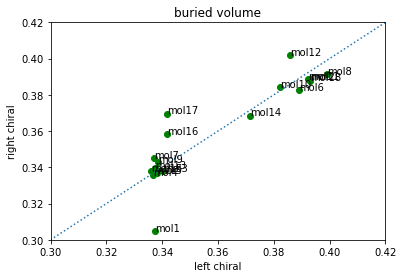

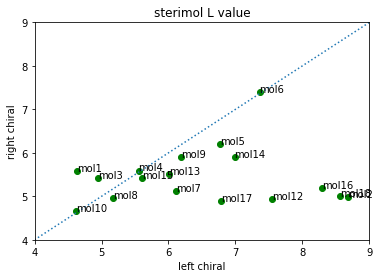

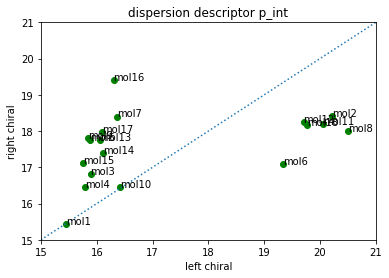

In [12]:
for key in chiral_props:
    plt.scatter(chiral_props[key][0], chiral_props[key][1], c='g', )
    plt.axline([0, 0], [1, 1], linestyle=':')
    plt.xlabel("left chiral")
    plt.ylabel("right chiral")
    plt.title(key)
    if key == "buried volume":
        plt.axis([0.3, 0.42, 0.3, 0.42])
    elif key == "dispersion descriptor p_int":
        plt.axis([15, 21, 15, 21])
    elif key == "sterimol L value":
        plt.axis([4, 9, 4, 9])
    for i, label in enumerate(labels):
        plt.annotate(label.replace("a", ""), (chiral_props[key][0][i], chiral_props[key][1][i]))
    plt.show()

## analyzing properties of N atom

### calculating methyl props

In [13]:
methyl_smiles_file = open('methyl_smiles.smi', 'r')
methyl_smiles = methyl_smiles_file.read().splitlines()

In [14]:
methyl_directory = Path('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/methyl_xyz/')

In [15]:
# list of properties
bv_methyl, cone_methyl, disp_methyl, ster_methyl, xtb_methyl = [], [], [], [], []

for filename in os.listdir(methyl_directory):
    if filename.endswith('.xyz'):
        elements, coordinates = morfeus.read_xyz('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/methyl_xyz/' + filename)

        # appending results to lists
        bv_methyl.append(morfeus.BuriedVolume(elements, coordinates, 1).fraction_buried_volume)
#        cone_methyl.append(morfeus.ConeAngle(elements, coordinates, 1).cone_angle) # Exception: ('Atoms within vdW radius of central atom:', '2 6 7')
        disp_methyl.append(morfeus.Dispersion(elements, coordinates).atom_p_int[1]) # P_int value
        ster_methyl.append(morfeus.Sterimol(elements, coordinates, 1, 2).L_value) # L value
#        xtb_methyl.append(morfeus.XTB(elements,coordinates).get_ip(corrected=True)) # corrected ionization potential   # need to dl xtra to work                      

### calculating amine properties

In [16]:
amine_directory = Path('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/amine_xyz/')

In [17]:
# list of properties
bv_amine, cone_amine, disp_amine, ster_amine, xtb_amine = [], [], [], [], []

for filename in os.listdir(amine_directory):
    if filename.endswith('.xyz'):
        elements, coordinates = morfeus.read_xyz('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/amine_xyz/' + filename)

        # appending results to lists
        bv_amine.append(morfeus.BuriedVolume(elements, coordinates, 1).fraction_buried_volume)
#        cone_amine.append(morfeus.ConeAngle(elements, coordinates, 1).cone_angle) # Exception: ('Atoms within vdW radius of central atom:', '2 6 7')
        disp_amine.append(morfeus.Dispersion(elements, coordinates).atom_p_int[1]) # P_int value
        ster_amine.append(morfeus.Sterimol(elements, coordinates, 1, 2).L_value) # L value
#        xtb_amine.append(morfeus.XTB(elements,coordinates).get_ip(corrected=True)) # corrected ionization potential   # need to dl xtra to work                      

### plotting

In [18]:
am_props = {
    'buried volume' : (bv_methyl, bv_amine),
    'sterimol L value' : (ster_methyl, ster_amine),
    'dispersion descriptor p_int' : (disp_methyl, disp_amine)
} 

In [29]:
mol_labels = ["mol" + str(i) for i in range(1, 52)]

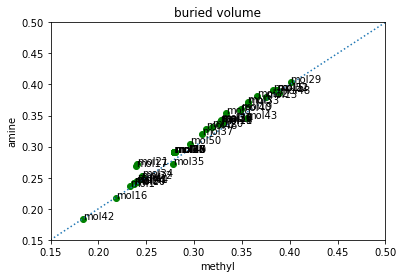

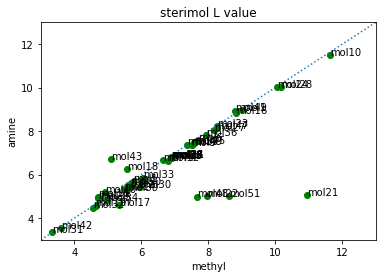

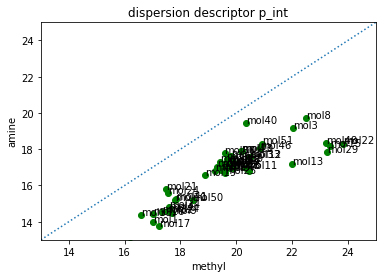

In [38]:
for key in am_props:
    plt.scatter(am_props[key][0], am_props[key][1], c='g', )
    plt.axline([0, 0], [1, 1], linestyle=':')
    plt.xlabel("methyl")
    plt.ylabel("amine")
    plt.title(key)
    if key == "buried volume":
        plt.axis([0.15, 0.5, 0.15, 0.5])
    elif key == "dispersion descriptor p_int":
        plt.axis([13, 25, 13, 25])
    elif key == "sterimol L value":
        plt.axis([3, 13, 3, 13])
    for i, label in enumerate(mol_labels):
        plt.annotate(label, (am_props[key][0][i], am_props[key][1][i]))
    plt.show()